## Purpose: Decay 

Demonstration: 
    1. Counting data from a exponentially decaying process
    2. Exponential model
    3. Maximum likelihood with Poisson error distribution.
    4. AmoebaFitter with other error distributions.

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from ExpModel import ExpModel
from PolynomialModel import PolynomialModel
from PoissonErrorDistribution import PoissonErrorDistribution
from AmoebaFitter import AmoebaFitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt
from Tools import printclass

define some constants

In [2]:
N = 201
a = 17.8
b = -0.2

make a 3-degree polynomial

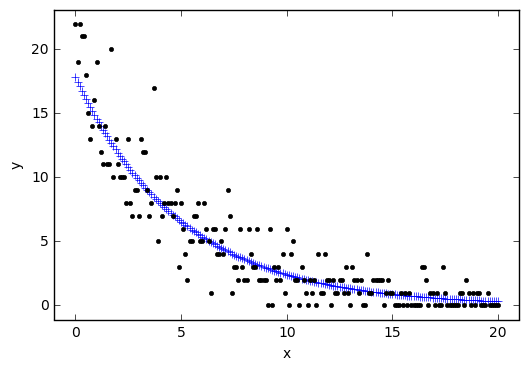

In [3]:
x = numpy.linspace( 0.0, 20.0, N, dtype=float )
ym = a * numpy.exp( b * x )

#y = ym + numpy.random.lognormal( ym, numpy.sqrt( ym ), N )
#y = numpy.asarray( y, dtype=int )
y = numpy.random.poisson( ym )
# plot the data along with the "truth"
plotFit( x, y, truth=ym )

Define the model

In [4]:
mdl = ExpModel( )
print( mdl )


Exp: f( x:p ) = p_0 * exp( p_1 * x )


define the fitter: AmoebaFitter with error distribution

In [5]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( y )

# show all attributes of the fitter class 
printclass( fitter )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++
AmoebaFitter
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
chisq           675.252524138
errdis          poisson
fitIndex        None
fixedScale      None
imageAssistant  None
isChisq         False
iter            35
keep            None
landscape       <MaxLikelihoodFitter._LogL object at 0x10ba3e898>
logLikelihood   -356.420600171
maxIter         2000
model           Exp
ndim            1
npfit           2
ntrans          71
nxdata          201
plotfreq        0
plotter         <IterationPlotter.IterationPlotter object at 0x10ba3e9b0>
power           2.0
simplex         [[ 18.32531859  -0.19973563]  [ 18.32531859  -0.19973563]  [ 18.33839107  -0.19983832]  ]
sumwgt          201
tolerance       0.0001
tooLarge        100
values          [356.420600171  356.420649849  356.420617945  ]
verbose         1
xdata           [0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  ... ]


In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )

Parameters : [   18.325   -0.200]
StDevs     : [    0.592    0.009]
Chisq      :   675.253
Scale      :     2.128
Evidence   :  -161.659


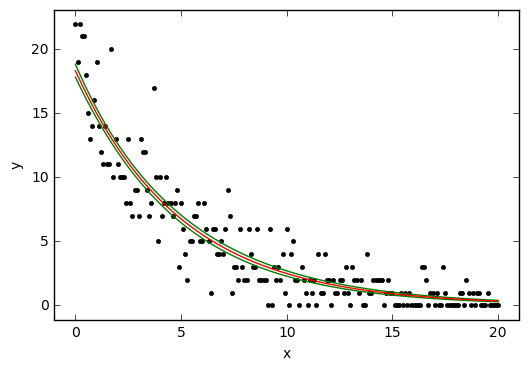

In [7]:
plotFit( x, y, mdl, ftr=fitter )

In [8]:
fitter = AmoebaFitter( x, mdl )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   18.963   -0.211]   669.091        25


In [9]:
fitter = AmoebaFitter( x, mdl, errdis="gauss" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   18.963   -0.211]   669.091        26


In [10]:
fitter = AmoebaFitter( x, mdl, errdis="laplace" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   19.074   -0.221]   676.165        38


In [11]:
fitter = AmoebaFitter( x, mdl, errdis="cauchy" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   16.924   -0.204]   748.362        26


In [12]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ))

[   18.336   -0.200]   675.058        22
